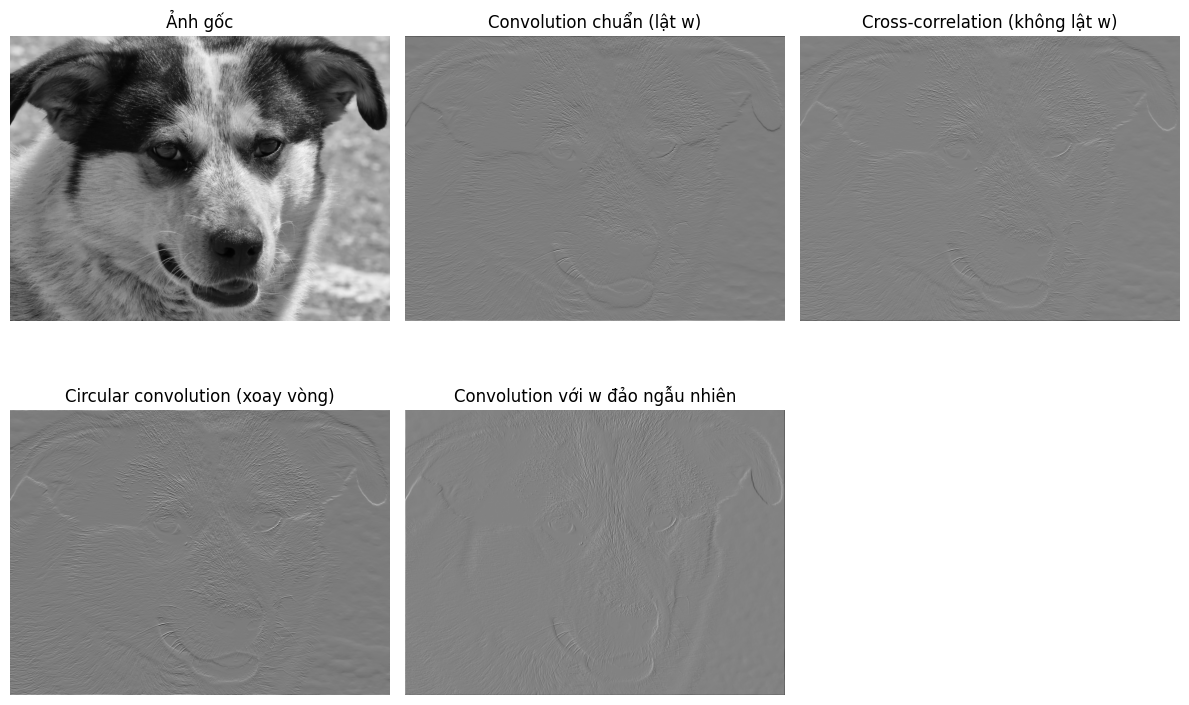

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image


img = Image.open('./data/cat_dog_images/dog-03.jpg').convert('L')
img = np.array(img) / 255.0


w = np.array([[-1, -1, -1],
              [0, 0, 0],
              [1, 1, 1]])


def conv2d_standard(x, w):
    
    return convolve2d(x, w, mode='same', boundary='fill', fillvalue=0)


def cross_correlation(x, w):
    
    return convolve2d(x, w[::-1, ::-1], mode='same', boundary='fill', fillvalue=0)


def circular_convolution(x, w):
    H, W = x.shape
    h, w_ = w.shape
    assert h == w_, "Bộ lọc nên là hình vuông"
    
    
    pad = h // 2
    x_pad = np.pad(x, pad, mode='wrap')
    
    y = np.zeros_like(x)
    for i in range(H):
        for j in range(W):
            region = x_pad[i:i+h, j:j+h]
            y[i, j] = np.sum(region * w)
    return y


def random_shuffle_w(w):
    w_flat = w.flatten()
    np.random.shuffle(w_flat)
    return w_flat.reshape(w.shape)


conv_result = conv2d_standard(img, w)
cross_result = cross_correlation(img, w)
circular_result = circular_convolution(img, w)
w_shuffled = random_shuffle_w(w)
random_result = conv2d_standard(img, w_shuffled)


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Ảnh gốc")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Convolution chuẩn (lật w)")
plt.imshow(conv_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Cross-correlation (không lật w)")
plt.imshow(cross_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Circular convolution (xoay vòng)")
plt.imshow(circular_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Convolution với w đảo ngẫu nhiên")
plt.imshow(random_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()